In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from utils import loadDataset

In [2]:
X_train, y_train, X_valid, y_valid, X_test, y_test = loadDataset()

print('TRAIN')
print(X_train.shape, y_train.shape)
print('VALIDATION')
print(X_valid.shape, y_valid.shape)
print('TEST')
print(X_test.shape, y_test.shape)

TRAIN
(7000, 784) (7000,)
VALIDATION
(7000, 784) (7000,)
TEST
(56000, 784) (56000,)


In [3]:
df = pd.DataFrame(columns = ['c','gamma','CV_accuracy'])
i = 0
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    for gam in ['scale', 'auto']:
        svm = SVC(C=c, kernel='poly', degree = 2, gamma = gam)
        scores = cross_val_score(svm, X_valid, y_valid, cv = 10, n_jobs = 50, verbose  = 0)
        validation_accuracy = scores.mean()
        print(f'C: {c} --- Gamma : {gam} --- CV accuracy: {validation_accuracy}')

        df.loc[i] = [c, gam, validation_accuracy]
        i += 1

print(df)

C: 0.0001 - Gamma : scale - CV accuracy: 0.11128571428571428
C: 0.0001 - Gamma : auto - CV accuracy: 0.11128571428571428
C: 0.001 - Gamma : scale - CV accuracy: 0.11228571428571428
C: 0.001 - Gamma : auto - CV accuracy: 0.11128571428571428
C: 0.01 - Gamma : scale - CV accuracy: 0.7327142857142857
C: 0.01 - Gamma : auto - CV accuracy: 0.11128571428571428
C: 0.1 - Gamma : scale - CV accuracy: 0.9087142857142856
C: 0.1 - Gamma : auto - CV accuracy: 0.11128571428571428
C: 1 - Gamma : scale - CV accuracy: 0.9507142857142858
C: 1 - Gamma : auto - CV accuracy: 0.7094285714285715
C: 10 - Gamma : scale - CV accuracy: 0.9541428571428572
C: 10 - Gamma : auto - CV accuracy: 0.9071428571428571
C: 100 - Gamma : scale - CV accuracy: 0.9538571428571428
C: 100 - Gamma : auto - CV accuracy: 0.9495714285714285
C: 1000 - Gamma : scale - CV accuracy: 0.9538571428571428
C: 1000 - Gamma : auto - CV accuracy: 0.9545714285714286
C: 10000 - Gamma : scale - CV accuracy: 0.9538571428571428
C: 10000 - Gamma : auto

In [8]:
poly_svc = SVC(C = 1000, kernel = 'poly', degree=2, gamma = 'auto')

start_train = time.time()
poly_svc.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = poly_svc.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)
print('Train time: ', time_train)
print('Test time: ',time_test)
print('Test accuracy = ', score)

Train time:  9.89134693145752
Test time:  109.18440866470337
Test accuracy =  0.9548214285714286


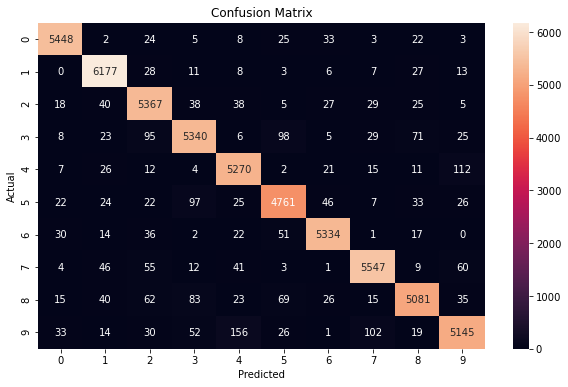

In [9]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()